---
title: "Particulate Matter Across Socioeconomic Strata of Countries"
author: "Juan F. Martinez"
format: html
bibliography: pm25-grdi-references.bib
html-table-processing: none
---


## Overview

In this lesson, you will use NASA socioeconomic and environmental Earthdata available at NASA [Socioeconomic Data and Applications Center](https://earthdata.nasa.gov/centers/sedac-daac) (SEDAC) to examine air quality by measuring concentrations of **particulate matter (PM)** data in different country-level administrative areas. We will focus on countries not meeting international health guidelines, and we will compare the PM concentration between areas with different levels of socioeconomic deprivation, a proxy for poverty, to determine if there is a correlation between exposure to air pollutants and poverty.

This lesson walks through the process of calculating and visualizing zonal statistics for a set of countries using spatial raster data, with a focus on PM2.5 concentrations and socioeconomic vulnerability characterized by the **Global Gridded Relative Deprivation Index (GRDI)**, tailored to different socioeconomic areas within each country. We will subset the GRDI and PM2.5 raster data for each country and compute relevant zonal statistics such as mean, median, and various percentiles for PM2.5 concentrations. These statistics are stored as a **GeoDataFrame**, a data table format that can store spatial data, which is later used to create a [choropleth map](https://data.europa.eu/apps/data-visualisation-guide/choropleth-maps) that visualizes specific PM2.5 concentration metrics across countries. The lesson includes a detailed analysis of PM2.5 concentrations within different GRDI quartiles for selected countries. This involves clipping the raster data to each country's geometry, filtering the data based on the GRDI quartiles, and calculating the mean PM2.5 levels for each quartile. The results are then visualized using customized plots to highlight the relationship between air quality and socioeconomic metrics across the selected countries.

## Learning Objectives

After completing this lesson, you should be able to:

-   Gain a general understanding of what is particulate matter (PM) in the air and how it impacts human health.
-   Learn about global socioeconomic dimensions of deprivation and how they are spatially represented.
-   Find statistical thresholds in socioeconomic data.
-   Perform zonal statistics to summarize spatial data
-   Resample spatial data to harmoniza and compare socioeconomic data against environmental data.
-   Display data on a map to get a general understanding of the spatial distribution of data.
-   Summarize spatial data into table plots to compare how air quality differs in different socioeconomic conditions of international administrative areas.

## Introduction

As we have learned from previous lessons in this module, air quality is an important factor that if unmitigated can pose significant health risks, particularly to children’s health. In this module, we will use global particulate matter (PM) spatial data and GADM administrative boundaries to determine the average PM2.5 concentrations in each country and determine if they are meeting the [World Health Organization’s (WHO’s)](https://www.who.int/) air quality guidelines. Furthermore we will use spatial population data to normalize the air pollution concentrations per capita. We will subset 10 countries to analyze how areas with different levels of multidimensional deprivation, a proxy for poverty, compare with regards to PM2.5 concentrations.

### Background

![Haze over eastern China](https://images-assets.nasa.gov/image/GSFC_20171208_Archive_e001269/GSFC_20171208_Archive_e001269~orig.jpg){style="object-fit: cover;  object-position:  left top; float: left; margin: 10px;" fig-align="center" height="300"} [^1]

[^1]: Image Credit: [NASA GSFC](https://images.nasa.gov/details/GSFC_20171208_Archive_e001269)

Air pollution is now recognized as the single biggest environmental threat to human health. Air pollution affects different aspects of health and impacts everyone in low, middle, and high-income countries alike. It is estimated that pollution is responsible for 9 million deaths per year [@fuller2022]. The burden of disease attributable to air pollution is now on a par with other major global health risks such as unhealthy diet and tobacco smoking [@who2021; @who2022]. Air pollution also places risks upon several of the United Nations’ [Sustainable Development Goals (SDGs)](https://sdgs.un.org/goals), including SDG 3 (Good health and well-being), SDG 11 (Sustainable Communities), and SDG 15 (Life on Land), among others [@un_sdgs_2024]. Monitoring air quality is crucial for tracking the well-being of people around the world and for the advancement of global sustainable development policies that address these environmental and social risks.

Particulate matter (PM₂.₅ and PM₁₀) can penetrate deep into the lungs and bloodstream, leading to respiratory and cardiovascular problems and being associated with conditions such as heart disease and lung cancer. [@who2022]. Benefits from improved air quality include prevention of air pollution-related premature deaths, chronic diseases, damages to ecosystems and crops, as well as the economic benefits for human health from air quality improvement [@calvin2023]. The United Nations Intergovernmental Panel on Climate Change’s (IPCC) latest Climate report acknowledges the largest adaptation gaps exist in projects that manage complex dynamics between air quality and climate risks, and that reductions in greenhouse gas (GHG) emissions would lead to improvements in air quality within a few years [@calvin2023]. Progress has been made to improve air quality, particularly in high-income countries, however; 99% of the world’s population is living in places where the World Health Organization’s (WHO’s) air quality guidelines are not being met [@who2021; @who2022].

The WHO Global Air Quality Guidelines, first introduced in 1987, recommends safe levels for six key pollutants—PM₂.₅, PM₁₀, ozone (O₃), nitrogen dioxide (NO₂), sulfur dioxide (SO₂), and carbon monoxide (CO) which represent critical risks to human health globally. Recently updated guidelines respond to new scientific findings demonstrating that even lower concentrations of air pollutants than previously understood can lead to severe health impacts. Table 1 shows the latest Air Quality Guidelines (AQG) for PM2.5.

We focus on PM2.5 because we will be working with the SEDAC Global Annual PM2.5 annual data.


```{=html}
<table>
  <caption>Table 1. WHO Recommended AQG levels and interim targets</caption>
  <thead>
    <tr>
      <th>Pollutant</th>
      <th>Averaging Time</th>
      <th colspan="4"> Interim Target</th>
      <th>AQG Level</th>
    </tr>
  </thead>
  <tbody>
    <tr>
        <td></td>
        <td></td>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td></td>
    </tr>
    <tr>
        <th rowspan="2">PM2.5, µg/m³</th>
        <td>Annual</td>
        <td>35</td>
        <td>25</td>
        <td>15</td>
        <td>10</td>
        <td>5</td>
    </tr>
    <tr>
        <td>24-hour</td>
        <td>75</td>
        <td>50</td>
        <td>37.5</td>
        <td>25</td>
        <td>15</td>
    </tr>

  </tbody>
</table>

\*99th percentile (i.e. 3-4 exceedance days per year).
```


Inequality, political instability, and increased cost of living are some of the causes preventing significant progress to reduce poverty and meet the SDGs. This continued environmental inequality can also be seen in the significant majority (89%) of premature deaths attributed to air pollution, which occur in low- and middle- income countries [@who2022]. In an account of 110 countries, 1.1 billion people (18%) are considered to live in “acute” multidimensional poverty, with half living in Sub-Saharan Africa and a third living in South Asia [@UNDP2023]. Studies have shown that persons with lower socioeconomic status disproportionately experience higher concentrations of pollutants [@Flanagan2019]. The level of poverty experienced by vulnerable communities can compound the risks posed by pollution leading to worsening well being and health outcomes.

## Data Collection and Integration

To determine whether countries are meeting WHO recommended AQG, we can use data of PM2.5 concentrations from the **Global (GL) Annual PM2.5 Grids from MODIS, MISR and SeaWiFS Aerosol Optical Depth (AOD), v4.03 (1998 – 2019)** dataset, which can can be downloaded from the Socioeconomic Data and Applications Center ([SEDAC](https://doi.org/10.7927/fx80-4n39))[@centerforinternationalearthscienceinformationnetwork-ciesin-columbiauniversity2022]. This data can be summarized using [GADM.org](https://gadm.org/) data, which provides administrative areas of many countries. We can determine the average concentration for the entire country area; however, many areas many not be populated by people, so we will use population data to subset areas where at least one person is living. This will also be used to normalize the data to a per-capita value and provide us with a better representation of the PM2.5 concentrations that people are experiencing.

once we determine the top 10 countries with the highest average per capita PM2.5 concentrations, we will use those results to further classify the data into socioeconomic strata in each country. We can compare the PM2.5 per capita concentrations in these different areas to observe the correlation between socioeconomic poverty and air pollution. We employ the **Global Gridded Relative Deprivation Index (GRDI), v1 (2010 – 2020)** dataset can be downloaded from [SEDAC](https://doi.org/10.7927/3xxe-ap97) as well [@centerforinternationalearthscienceinformationnetwork-ciesin-columbiauniversity2022a].

### Preparing Computing Environment and Variables

Importing python packages required: The python packages are required for the remainder of the lesson. Please review the Python documentation of these packages for detailed information.


In [1]:
import xarray as xr
import rioxarray
import rasterstats
from rasterio.enums import Resampling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pygadm
import plotly.graph_objects as go 

Load the GRDIv1 and PM2.5 data from local sources:


In [2]:
# Load rasters
grdi_path = r"data\povmap-grdi-v1\povmap-grdi-v1.tif"
pm25_path = r"data\sdei-global-annual-gwr-pm2-5-modis-misr-seawifs-aod-v4-gl-03-2019-geotiff\sdei-global-annual-gwr-pm2-5-modis-misr-seawifs-aod-v4-gl-03-2019.tif"

Using the package rasterio to load the data into memory. This allows us to read the data and use it for processing.


In [3]:
# Open the input and reference rasters
grdi_raster = rioxarray.open_rasterio(grdi_path, mask_and_scale=True)
pm25_raster = rioxarray.open_rasterio(pm25_path, mask_and_scale=True)

### Matching Data Points using Bilinear Resample

The GRDI raster and PM2.5 rasters are incompatible in resolution. One method of harmonizing data is by using the `Resampling` tool with a *bilinear* method. In this case, we reduce, or coarsen, the resolution of the GRDI raster to match the PM2.5 raster.


In [4]:
# Resample the input raster to match the reference raster
grdi_raster = grdi_raster.rio.reproject_match(pm25_raster,resampling=Resampling.bilinear)

## Previewing Spatial Data in a Plot

Once the data rasters have been resampled to the same resolution, we can quickly plot them to view the data we are working with on a map.


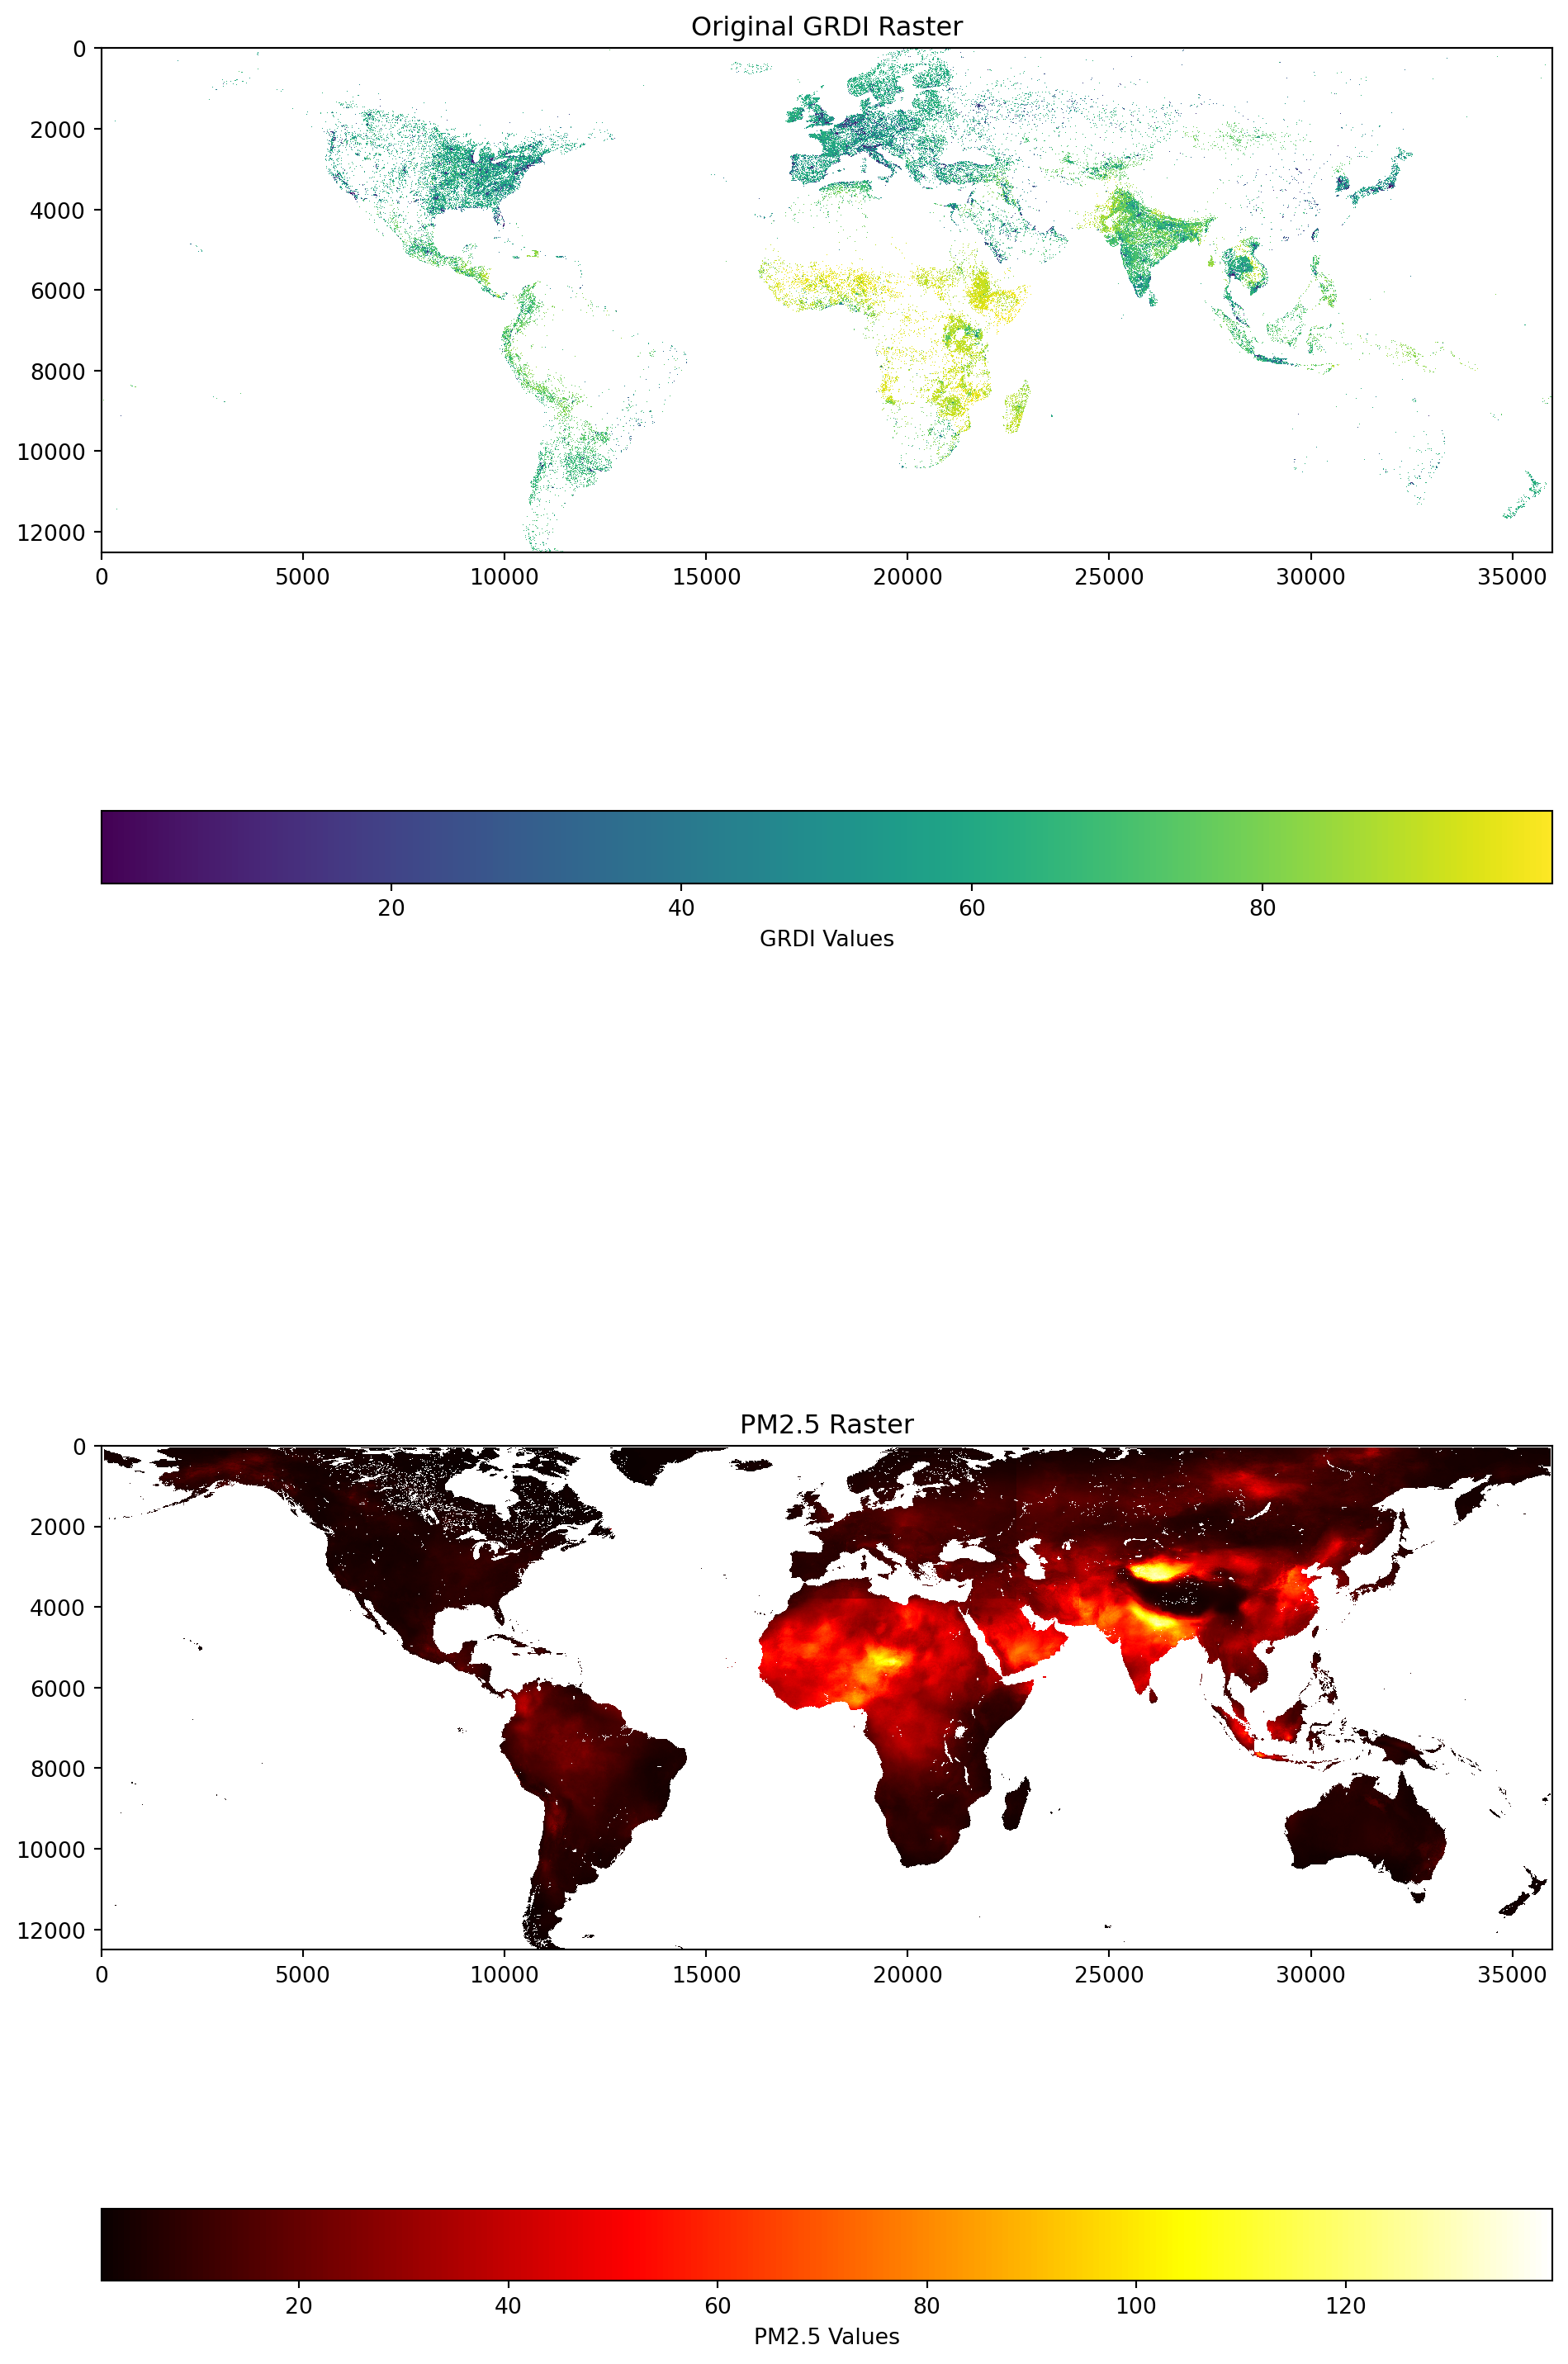

In [5]:
# Plotting the rasters
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 20))

# Plot the original GRDI raster in the first subplot
im1 = ax1.imshow(grdi_raster.values[0], cmap='viridis', interpolation='nearest')
ax1.set_title('Original GRDI Raster')
fig.colorbar(im1, ax=ax1, orientation='horizontal', label='GRDI Values')

# Plot the PM2.5 raster in the second subplot
im2 = ax2.imshow(pm25_raster.values[0], cmap='hot', interpolation='nearest')
ax2.set_title('PM2.5 Raster')
fig.colorbar(im2, ax=ax2, orientation='horizontal', label='PM2.5 Values')


# Show the plots
plt.tight_layout()
plt.show()

## Working with administrative Data

`pygadm` is a package that has international administrative units from levels 0 to 2. We can search the available countries by listing the Names.


In [6]:
country_table = gpd.GeoDataFrame(pygadm.Names())
len(country_table)

263

Some available areas with a unique `GID_0` code share Names; therefore we drop the rows that contain digits.


In [7]:
country_table = country_table[~country_table['GID_0'].str.contains('\d', na=False)]
len(country_table)

254

### Subset Data From a Table

Doing Zonal statistics for more than 200 countries may take a while, therefore, we can subset the data randomly with the `.sample()` method.


In [8]:
country_sample = country_table.sample(n=30)
country_sample

,NAME_0,GID_0
168,Norfolk Island,NFK
54,Cabo Verde,CPV
27,Saint-Barthélemy,BLM
10,American Samoa,ASM
142,Saint-Martin,MAF
104,Indonesia,IDN
86,Gibraltar,GIB
63,Djibouti,DJI
188,North Korea,PRK
125,Kyrgyzstan,KGZ


## Zonal Statistics for Each Administrative Area

`rasterstats` has a funcion `zonal_stats()` which allows you to use vectors to summarize raster data. We summarize GRDIv1 data to calculate the following statistics: count, minimum, mean, max, median, standard deviation, range, and percentiles 20, 40, 60, and 80.

We can **define a custom function** that can allow us to use the zonal statistics process multiple times. A custom function can be created using the `def FUNCTION_NAME(PARAMETER1, PARAMETER2):` fuction to define what the fucntion will do.


In [9]:
def calculate_country_stats(country_sample, grdi_raster, pm25_raster=None):
    """
    Calculate statistics for each country in the sample.

    Parameters:
    - country_sample: A pandas DataFrame containing country information with 'NAME_0' and 'GID_0' columns, in this case the country_table.
    - grdi_raster: A raster object with which to perform the zonal statistics.
    - pm25_raster: (Optional) A raster object for PM2.5 data. If provided, statistics will also be calculated for this raster.

    Returns:
    - stats_results: A GeoDataFrame containing the statistics for each country.
    """
    stats_results = gpd.GeoDataFrame()

    for index, row in country_sample.iloc[:].iterrows():
        country = row['NAME_0']
        country_GID = row['GID_0']
        try:
            country_poly = pygadm.Items(admin=country_GID, content_level=0)
            if isinstance(country_poly, gpd.GeoDataFrame):
                country_geometry = country_poly.geometry.iloc[0]  # Ensure single geometry
            else:
                country_geometry = country_poly
        except Exception as e:
            print(country, "skipped due to error:", e)
            continue

        # Create a mask for the polygons and perform zonal statistics on GRDI raster
        grdi_country_zs = rasterstats.zonal_stats(
            country_geometry, grdi_raster.values[0], 
            affine=grdi_raster.rio.transform(), 
            stats=" min mean max percentile_20 percentile_40 percentile_60 percentile_80",
            nodata_value=grdi_raster.rio.nodata
        )

        # Uncomment and update the following lines if you want to include PM2.5 statistics
        if pm25_raster is not None:
            pm25_country_zs = rasterstats.zonal_stats(
                country_geometry, pm25_raster.values[0], 
                affine=pm25_raster.rio.transform(), 
                stats="mean",
                nodata_value=pm25_raster.rio.nodata
                )

        # Extract statistics into a dictionary
        country_stats = {
            'Country_Name': country,
            'Country_GID' : country_GID,
            # 'GRDI_Count': grdi_country_zs[0]['count'],
            'GRDI_Min': grdi_country_zs[0]['min'],
            'GRDI_Mean': grdi_country_zs[0]['mean'],
            'GRDI_Max': grdi_country_zs[0]['max'],
            # 'GRDI_Median': grdi_country_zs[0]['median'],
            # 'GRDI_Std': grdi_country_zs[0]['std'],
            # 'GRDI_Range': grdi_country_zs[0]['range'],
            'GRDI_P20': grdi_country_zs[0]['percentile_20'],
            'GRDI_P40': grdi_country_zs[0]['percentile_40'],
            'GRDI_P60': grdi_country_zs[0]['percentile_60'],
            'GRDI_P80': grdi_country_zs[0]['percentile_80']#,
            # 'geometry' : country_poly['geometry'].iloc[0]
        }

        # If PM2.5 statistics are calculated, add them to the dictionary
        if pm25_raster is not None:
            country_stats.update({
                'PM25_Mean': pm25_country_zs[0]['mean']
            })
        
        # Filter out None values from `country_stats`
        country_stats = {k: v for k, v in country_stats.items() if pd.notnull(v)}

        country_stats_gdf = gpd.GeoDataFrame([country_stats], geometry=[country_geometry])

        # Append to results if country_stats_gdf has non-empty columns
        if not country_stats_gdf.empty and country_stats_gdf.notna().any().any():
            stats_results = pd.concat([stats_results, country_stats_gdf], ignore_index=True)

    # Drop any rows in `stats_results` that have NaN in any cell
    stats_results = stats_results.dropna()
    # Reset the index
    stats_results = stats_results.reset_index(drop=True)
    return stats_results


Let's put our defined function to use:


In [10]:
stats_results = calculate_country_stats(country_sample, grdi_raster, pm25_raster)

C:\Users\jmartine\AppData\Local\ESRI\conda\envs\agsdev\lib\site-packages\rasterstats\io.py:335: NodataWarning:

Setting nodata to -999; specify nodata explicitly



Pakistan skipped due to error: Must have equal len keys and value when setting with an iterable


Let's use the `.head()` method from Pandas to check the top of our table


In [11]:
stats_results.head()

,Country_Name,Country_GID,GRDI_Min,GRDI_Mean,GRDI_Max,GRDI_P20,GRDI_P40,GRDI_P60,GRDI_P80,PM25_Mean,geometry
0,Norfolk Island,NFK,58.128010,64.551060,66.517952,63.351196,64.565967,65.563477,66.095909,3.500000,"MULTIPOLYGON (((167.9534 -29.1158, 167.9611 -2..."
1,Cabo Verde,CPV,14.687461,70.523991,81.416824,65.835316,71.884143,75.495181,77.588643,29.316463,"MULTIPOLYGON (((-23.5065 14.9082, -23.506 14.9..."
2,American Samoa,ASM,17.402060,56.672170,77.748680,42.584675,57.655781,65.079147,68.033958,1.700000,"MULTIPOLYGON (((-170.6806 -14.2825, -170.6768 ..."
3,Indonesia,IDN,10.161049,66.031281,92.142830,56.634880,68.849022,73.297453,75.740378,21.858190,"MULTIPOLYGON (((138.9103 -8.0588, 138.9135 -8...."
4,Djibouti,DJI,26.355202,77.480739,94.670731,70.784187,84.738541,85.735367,85.902008,29.390377,"MULTIPOLYGON (((43.0834 11.182, 43.0013 11.051..."


So far, we have collected the overall average PM2.5 for the countries. Based on the WHO Air Quality guidelines for PM2.5, we subset the dataframe to keep only countries with the mean PM2.5 value greater than or equal to 5.0:


In [12]:
stats_results = stats_results[stats_results["PM25_Mean"] >= 5.0]
print(len(stats_results))

20


In [13]:
# Assuming the column with names is called 'Name'
# Define the bins and labels
bins = [5, 10, 15, 25, 30, float('inf')]
labels = ["5-10", "10-15", "15-25", "25-30", ">30"]

# Use .loc to add the new column with binned ranges, avoiding SettingWithCopyWarning
stats_results.loc[:, 'PM25_range'] = pd.cut(stats_results["PM25_Mean"], bins=bins, labels=labels, right=False).astype(str)

# Group by the 'PM25_range' and list names in each range
grouped = stats_results.groupby('PM25_range', observed=True)['Country_Name'].agg(['count', list]).reset_index()
grouped.columns = ['PM25_range', 'Count', 'Names']  # Rename columns for clarity

# Set display option to prevent truncation of long lists in the output
pd.set_option('display.max_colwidth', None)

print(grouped)

# Reset Pandas to default display options
pd.reset_option("display.max_colwidth")


  PM25_range  Count  \
0      10-15      2   
1      15-25      7   
2      25-30      2   
3       5-10      7   
4        >30      2   

                                                                              Names  
0                                                          [Swaziland, Timor-Leste]  
1  [Indonesia, North Korea, Kyrgyzstan, Northern Cyprus, Suriname, Serbia, Albania]  
2                                                            [Cabo Verde, Djibouti]  
3                [Lesotho, Chile, Haiti, Barbados, Puerto Rico, Zimbabwe, Tanzania]  
4                                                                  [Sudan, Senegal]  


From the table above, we can see how many and which countries are within the WHO AQG, or are within interim stages of air quality improvement.

Below, choose an attribute, or column, to display it in a map plot. In this case, I'm choosing the PM2.5 Mean.


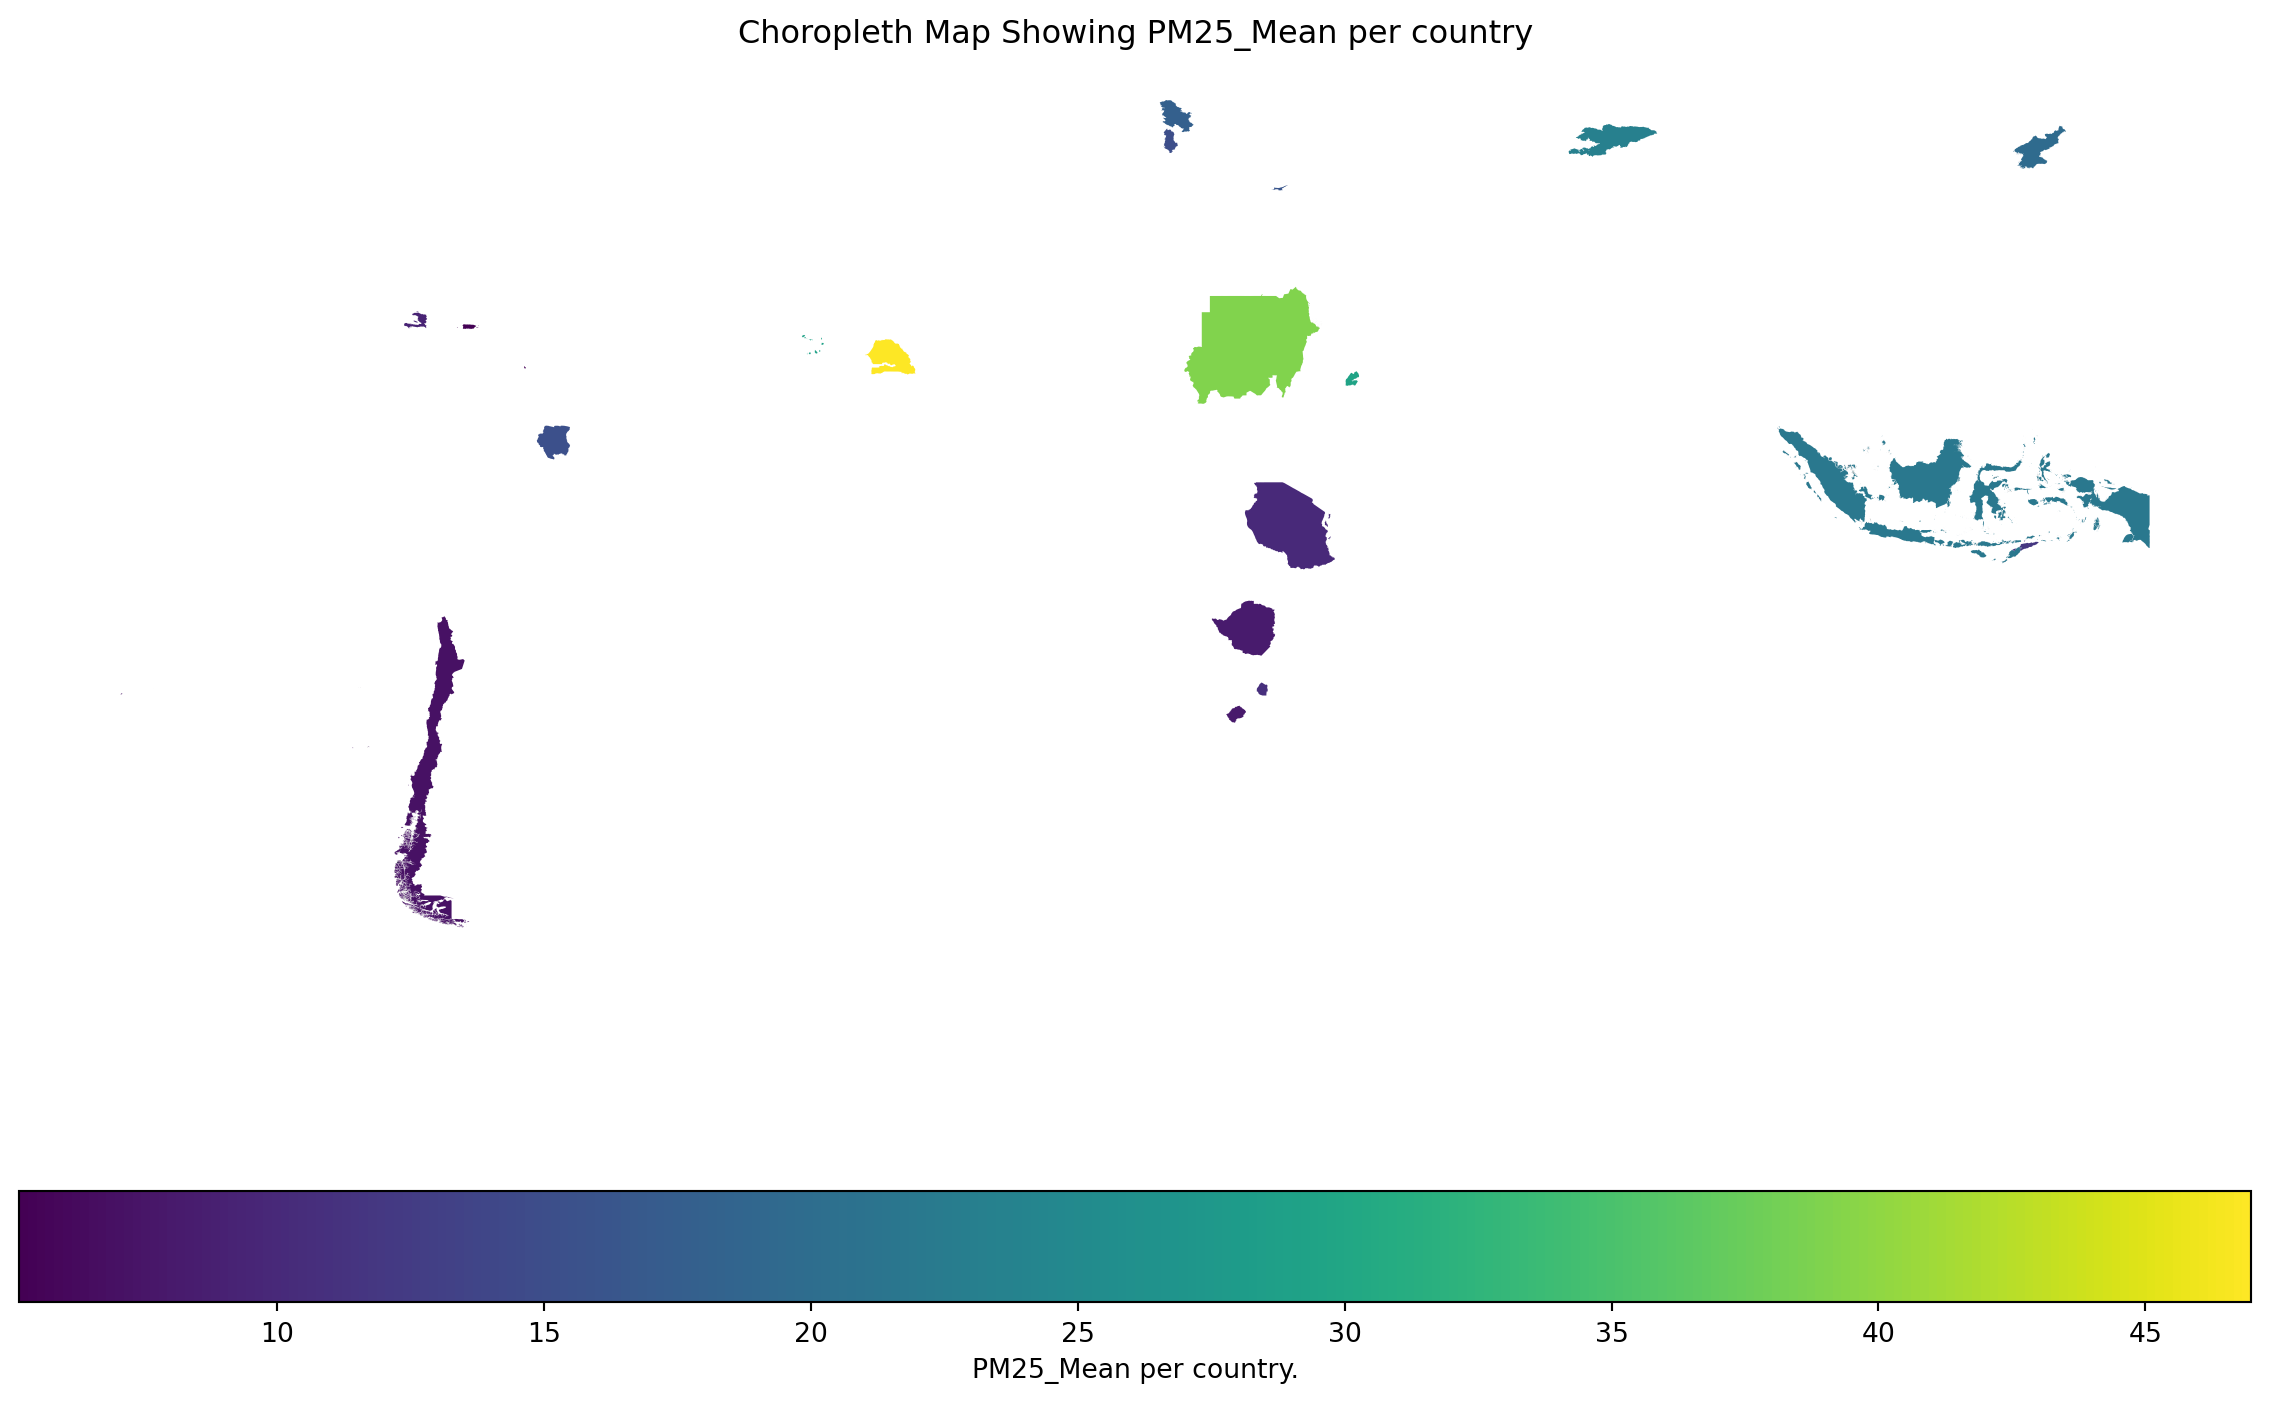

In [14]:
column_chosen = 'PM25_Mean' # 'GRDI_Max' #GRDI_Max, GRDI_Min, GRDI_Median
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
stats_results.plot(column=column_chosen, ax=ax, legend=True,
    legend_kwds={'label': f"{column_chosen} per country.",
                      'orientation': "horizontal"})
ax.set_title(f'Choropleth Map Showing {column_chosen} per country')
ax.set_axis_off()  # Turn off the axis numbers and ticks
plt.show()

### Selecting Data by Column

Start my creating a list of countries that you are interested in to Subset data from the DataFrame that match the values in the `NAME_0` column. The `.isin()` mehthod checks each element in the DataFrame's column for the item present in the list and returns matching rows.


In [15]:
# selected_countries = ["Algeria", "Somalia", "Colombia", "Timor Leste", "Finland", "Nicaragua", "United Kingdom", "Mali"]
# selected_countries = ["Anguilla", "Armenia", "Angola", "Argentina", "Albania", "United Arab Emirates", "American Samoa", "Australia" ]
selected_countries = ["Algeria", "Somalia", "Colombia", "Timor Leste", "Finland", "Nicaragua", "United Kingdom", "Mali", "Armenia", "Argentina",  "Albania", "United Arab Emirates", "Indonesia", "Qatar"]

#use the list above to subset the country_table DataFrame by the column NAME_0 
selected_countries = country_table[country_table['NAME_0'].isin(selected_countries)]

### Using a Defined Custom Function

Recalling the defined fucntion `calculate_country_stats`, we can use our `selected_countries` list, and the GRDI and PM2.5 rasters, to create a new table of zonal statistics.


In [16]:
stats_results = calculate_country_stats(selected_countries, grdi_raster, pm25_raster)

Show the head of the table again:


In [17]:
stats_results.head()

,Country_Name,Country_GID,GRDI_Min,GRDI_Mean,GRDI_Max,GRDI_P20,GRDI_P40,GRDI_P60,GRDI_P80,PM25_Mean,geometry
0,Albania,ALB,8.272310,61.513866,75.395561,55.861691,64.445587,67.104332,68.589424,15.063068,"MULTIPOLYGON (((20.0541 39.6917, 20.0389 39.69..."
1,United Arab Emirates,ARE,5.732072,42.347647,67.470955,24.688158,38.623690,50.710212,61.909930,49.507895,"MULTIPOLYGON (((54.1541 22.7548, 53.3313 22.85..."
2,Argentina,ARG,7.572341,66.341158,81.701645,66.774644,68.278297,69.335506,71.098463,7.083989,"MULTIPOLYGON (((-66.5458 -55.061, -66.5486 -55..."
3,Armenia,ARM,6.944193,59.871617,73.707901,52.692970,61.288190,66.743028,69.004848,15.958348,"MULTIPOLYGON (((45.8319 39.8311, 45.8448 39.82..."
4,Colombia,COL,11.956444,71.523674,84.922409,69.966937,72.190059,74.405400,76.502792,22.305299,"MULTIPOLYGON (((-77.491 4.1451, -77.4985 4.140..."


Plot the map again choosing a column to plot:


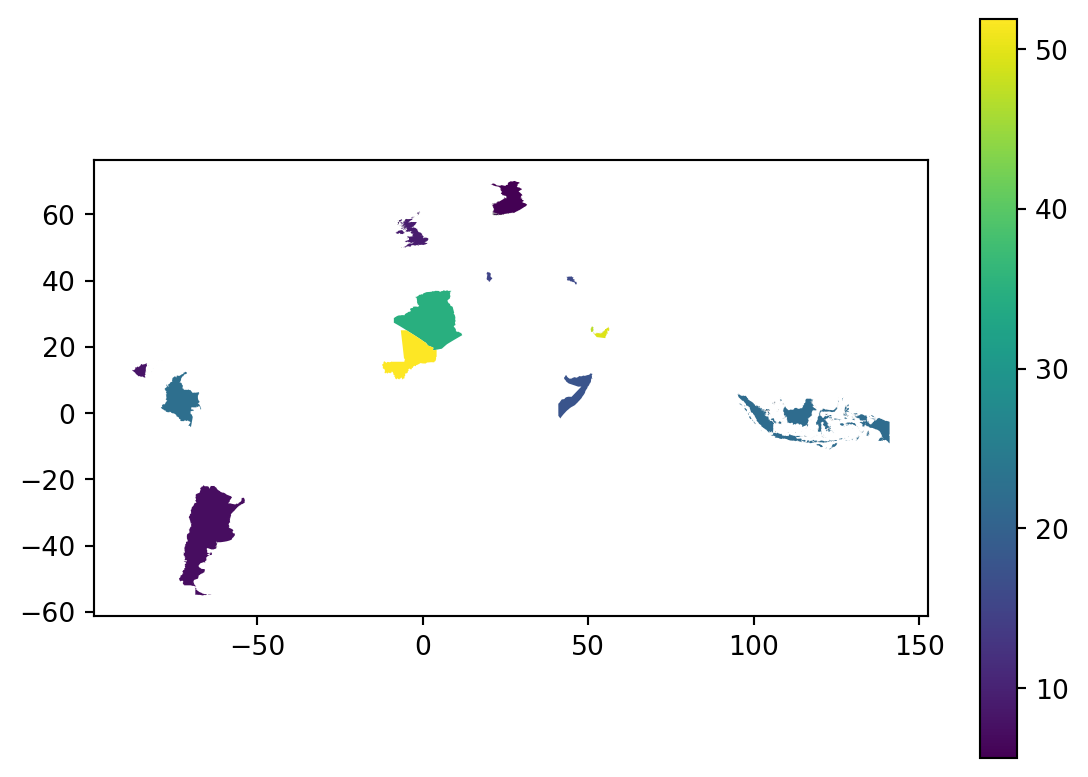

In [18]:
column_chosen = 'PM25_Mean'  #'GRDI_Max' #GRDI_Max, GRDI_Min, GRDI_Median
stats_results.plot(column=column_chosen, legend=True)
plt.show() 

## Creating a Table with Results

We can create a list of **tuples** that we can use to refer to the statistical values, and the name, color, and symbol we want to assign. In this case, we are using the GRDI zonal statistics of each country we selected that include the Mean, Minimum, Maximum, and interquartiles.


In [19]:
# List of GRDI values and their corresponding properties
#column, value name, color, symbol
grdi_data = [
    ('GRDI_Mean', 'Mean', 'orange', 'diamond'),
    ('GRDI_Min', 'Min', 'gray', '152'),
    ('GRDI_Max', 'Max', 'gray', '151'),
    ('GRDI_P20', 'Q20', 'blue', '142'),
    ('GRDI_P40', 'Q40', 'purple', '142'),
    ('GRDI_P60', 'Q60', 'green', '142'),
    ('GRDI_P80', 'Q80', 'red', '142')
]

We can create a figure to display the data based on the names colors and symbols we selected.


In [20]:
# Create a figure
fig = go.Figure()

# Add traces to the figure based on the data
for col, name, color, symbol in grdi_data:
    fig.add_trace(go.Scatter(
        x=stats_results[col],
        y=stats_results['Country_Name'],
        mode='markers',
        name=name,
        marker=dict(color=color, size=10, symbol=symbol)
    ))

# Customize layout
fig.update_layout(
    title='GRDI Statistics by Country',
    xaxis_title='GRDI Values',
    yaxis_title='Country Name',
    yaxis=dict(tickmode='linear'),
    legend_title='Statistics',
    yaxis_type='category',
    xaxis=dict(tickvals=[0, 20, 40, 60, 80, 100])
)

# Show plot
fig.show()

## Summarizing PM2.5 Values by Socioeconomic Deprivation

Considering the GRDI quartile values as a level of socieoeconomic deprivation within each country, we can use the `stats_results` GeoDataFrame, the GRDI raster, and the PM2.5 raster to calculate the Mean PM.25 value within each of those areas in each country. This can describe how the air quality for different socioeconomic strata compare within the country, as well as against other countries.

The results will be added to the `stats_results` with the corresponting columns.


In [21]:
# iterate through the stats_results table rows
for index, row in stats_results.iloc[:].iterrows():
    #isolate each country's respective row
    row_df = gpd.GeoDataFrame([row], geometry='geometry').reset_index(drop=True)
    print(row_df.loc[0,'Country_GID'])
    try:
        #use rioxarray to clip the GRDI and PM2.5 rasters by the geometry of the respective country.
        grdi_country = grdi_raster.rio.clip(row_df.geometry, grdi_raster.rio.crs)
        pm25_country = pm25_raster.rio.clip(row_df.geometry, grdi_raster.rio.crs)
    except:
        print('Error in clip')
        continue

    #Applying squeeze() to this array removes the singleton dimension, reducing it to a 2D array with dimensions (rows, columns)
    grdi_country= grdi_country.squeeze()
    pm25_country= pm25_country.squeeze()


    # Subset the GRDI raster where values fall between each GRDI quintiles
    grdi_countryQ1 = grdi_country.where((grdi_country >= row_df.loc[0, 'GRDI_Min']) & (grdi_country <= row_df.loc[0, 'GRDI_P20']))
    grdi_countryQ2 = grdi_country.where((grdi_country >= row_df.loc[0, 'GRDI_P20']) & (grdi_country <= row_df.loc[0, 'GRDI_P40']))
    grdi_countryQ3 = grdi_country.where((grdi_country >= row_df.loc[0, 'GRDI_P40']) & (grdi_country <= row_df.loc[0, 'GRDI_P60']))
    grdi_countryQ4 = grdi_country.where((grdi_country >= row_df.loc[0, 'GRDI_P60']) & (grdi_country <= row_df.loc[0, 'GRDI_P80']))
    grdi_countryQ5 = grdi_country.where((grdi_country >= row_df.loc[0, 'GRDI_P80']) & (grdi_country <= row_df.loc[0, 'GRDI_Max']))


    # Mask the PM2.5 raster using the above GRDI quartile rasters, keeping only the cells that intersect
    pm25_countryQ1 = pm25_country.where(grdi_countryQ1.notnull())
    pm25_countryQ2 = pm25_country.where(grdi_countryQ2.notnull())
    pm25_countryQ3 = pm25_country.where(grdi_countryQ3.notnull())
    pm25_countryQ4 = pm25_country.where(grdi_countryQ4.notnull())
    pm25_countryQ5 = pm25_country.where(grdi_countryQ5.notnull())

    #Find the mean value of of the intersected PM2.5 rasters in each quartile
    pm25_countryQ1v = pm25_countryQ1.mean().item()
    pm25_countryQ2v = pm25_countryQ2.mean().item()
    pm25_countryQ3v = pm25_countryQ3.mean().item()
    pm25_countryQ4v = pm25_countryQ4.mean().item()
    pm25_countryQ5v = pm25_countryQ5.mean().item()

    #add the resuts to the stats_results table in the respective column
    stats_results.at[index, 'PM25_Q1'] = pm25_countryQ1v
    stats_results.at[index, 'PM25_Q2'] = pm25_countryQ2v
    stats_results.at[index, 'PM25_Q3'] = pm25_countryQ3v
    stats_results.at[index, 'PM25_Q4'] = pm25_countryQ4v
    stats_results.at[index, 'PM25_Q5'] = pm25_countryQ5v

ALB


ARE


ARG


ARM


COL


DZA


FIN


GBR


IDN


MLI


NIC


QAT


SOM


## Plot Results of Mean PM2.5 in Socieceonomic Deprivation Quartiles per country

Similarly, we create a list of tuples of how we want to display the data, and create a figure based on the tuples. This plot would show each country in the y axis and the Log of Mean PM2.5 values in each country's GRDI quarties.


In [22]:
# List of GRDI values and their corresponding properties
#column, value name, color, symbol
plot_data =[
    ('PM25_Q1', 'Q1', '#440154', '6'),  # Light Blue
    ('PM25_Q2', 'Q2', '#31688E', '5'),  # Light Green
    ('PM25_Q3', 'Q3', '#35B779', '7'),  # Yellow
    ('PM25_Q4', 'Q4', '#FDE725', '8'),  # Orange
    ('PM25_Q5', 'Q5', '#FF0000', '1')   # Red
]

# Create a figure
fig = go.Figure()

# Add traces to the figure.
for col, name, color, symbol in plot_data:
    xlog  = np.log(stats_results[col])
    fig.add_trace(go.Scatter(
        x=stats_results[col], #xlog,
        y=stats_results['Country_Name'],
        mode='markers+text',  # Add 'text' to mode
        text=[f'<b>{name}</b>' for _ in stats_results[col]],  # Repeat name for each point
        name=name,
        textfont=dict(color=color, size=12),
        textposition='top center',  # Position the text above the symbol
        marker_color=color,
        marker_line_color="midnightblue",
        marker_symbol=symbol,
        marker_size=14,
        marker_line_width=2,
        marker_opacity=0.6
        ))
fig.update_traces(textposition='top center')

    # Customize layout
fig.update_layout(
    title='Mean PM2.5 in each GRDI Quartile by Country',
    xaxis_title='PM2.5 Mean Values',
    yaxis_title='Country Name',
    yaxis=dict(tickmode='linear'),
    legend_title='Statistics',
    yaxis_type='category',
    xaxis=dict(rangemode="tozero"),
    
    #xaxis=dict(tickvals=[0, 20, 40, 60, 80, 100])
    )

# Show plot
fig.show()

Use the plotly controls to take a closer look at the results.

With this shapely plot, We can examine differences between countries and PM2.5 values. The plot displays the coutnries on the Y axis and log values of the average PM2.5 value on the X axis. Each country displays PM2.5 values averaged within the quartile areas based on GRDI values of each country. A higher quartile (Q) implies a higher degree of deprivation, 1 being the lowest and 5 the highest.

::: {.callout-tip style="color: #9f0b64;"}
#### Knowledge Check

1.  Which countries did you identify to be over the WHO AQG values?
2.  Which countries have higher contentrations of air pollution in lower socioecomnomic strata?
3.  Which are the opposite?
:::

Congratulations! .... Now you should be able to:

-   Understand particulate matter (PM2.5) in the air and its effects on human health.
-   Explore the global socioeconomic dimensions of deprivation and their spatial representations.
-   Identify statistical thresholds in socioeconomic datasets.
-   Use zonal statistics to summarize spatial data.
-   Create maps to visualize spatial data distribution.
-   Resample spatial data to harmonize the compare socioeconomic data with environmental data.
-   Summarize spatial data in tables to analyze how air quality differs across different socioeconomic conditions in administrative areas around the world.

## Module 2: Air Quality Home

In this lesson, we explored ....

[Module 2: Air Quality](https://ciesin-geospatial.github.io/TOPSTSCHOOL-air-quality/index.html){.btn .btn-primary .btn role="button"}